In [0]:
#!git clone https://github.com/NSCC-COGS/GDAA2030.git

In [0]:
%cd /content/GDAA2030/tutorial2/votius/

/content/GDAA2030/tutorial2/votius


In [0]:
%%capture
run GDAA2030_T2_MKirby_getLandsat.ipynb

In [0]:
print(selectedScene)

productId                   LC08_L1TP_123039_20200209_20200209_01_RT
entityId                                       LC81230392020040LGN00
acquisitionDate                           2020-02-09 02:56:21.542455
cloudCover                                                      1.35
processingLevel                                                 L1TP
path                                                             123
row                                                               39
min_lat                                                      29.2326
min_lon                                                       112.65
max_lat                                                      31.3625
max_lon                                                      114.972
download_url       https://s3-us-west-2.amazonaws.com/landsat-pds...
lat                                                          30.2975
lon                                                          113.811
dist                              

In [0]:
from matplotlib import pyplot as plt
import tifffile
import numpy as np

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
def ourPlot(a, interpolation = 'bilinear', histogram=True):
  stats = {
      'max' : np.nanmax(a),
      'min' : np.nanmin(a),
      'mean' : np.nanmean(a),
      'std' : np.nanstd(a),
      'bitDepth' : a.dtype,
      'dimensions' : a.shape,
      'top_left_value' : a[0,0]
  }
  for item in stats:
    print('%s: %s'%(item, stats[item]))
  
  plt.cla()
  plt.subplot(121)
  plt.imshow(a, interpolation = interpolation)
  if histogram:
    plt.subplot(122)
    plt.hist(a.flatten(), bins=100)
    s0 = stats['mean'] - stats['std']
    s1 = stats['mean'] + stats['std']
    plt.axvline(s0, c='red')
    plt.axvline(s1, c='red')


max: 63811
min: 0
mean: 5783.940146756299
std: 3738.808497413152
bitDepth: uint16
dimensions: (7691, 7531)
top_left_value: 0


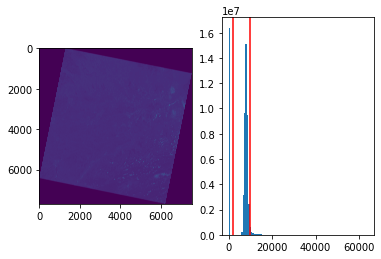

In [0]:
imageFullSize = tifffile.imread(imagePath)
ourPlot(imageFullSize)

max: 32321
min: 0
mean: 5770.214323607427
std: 3744.9870600515164
bitDepth: uint16
dimensions: (770, 754)
top_left_value: 0


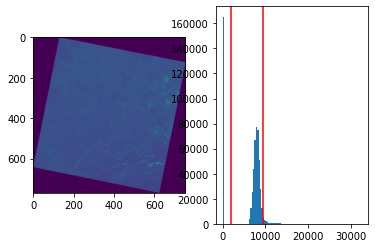

In [0]:
image = imageFullSize[::10,::10]
ourPlot(image)

max: True
min: False
mean: 0.28474456577904855
std: 0.45129269663750327
bitDepth: bool
dimensions: (770, 754)
top_left_value: True


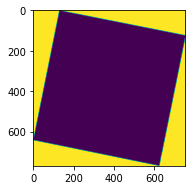

In [0]:
mask = image == 0
ourPlot(mask, histogram=False)

max: 1
min: 0
mean: 0.28474456577904855
std: 0.45129269663750327
bitDepth: int32
dimensions: (770, 754)
top_left_value: 1


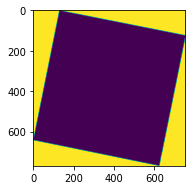

In [0]:
from scipy.ndimage import label
labelMask,unused = label(mask)
ourPlot(labelMask, histogram=False)

In [0]:
print(image.mean())
print(image[~mask].mean())

5770.214323607427
8067.347757926904


max: True
min: False
mean: 0.3244359089186675
std: 0.4681636999200019
bitDepth: bool
dimensions: (770, 754)
top_left_value: False


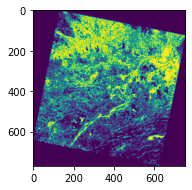

In [0]:
thresholdImage = image > image[~mask].mean()
ourPlot(thresholdImage, histogram=False)

max: True
min: False
mean: 0.3244359089186675
std: 0.4681636999200019
bitDepth: bool
dimensions: (770, 754)
top_left_value: False


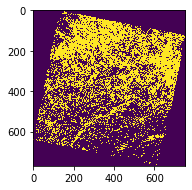

In [0]:
ourPlot(thresholdImage, interpolation = 'nearest', histogram=False)

max: 17895
min: 0
mean: 1018.5485652278755
std: 3172.3189558190475
bitDepth: int32
dimensions: (770, 754)
top_left_value: 0


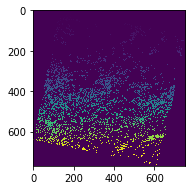

In [0]:
labelThreshold,unused = label(thresholdImage)
ourPlot(labelThreshold, interpolation = 'nearest', histogram=False)

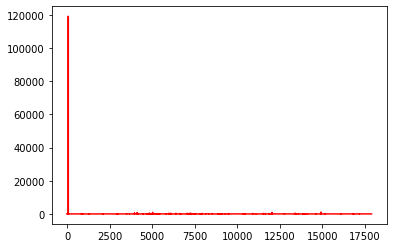

In [0]:
labels, pixelCount = np.unique(labelThreshold[labelThreshold!=0], return_counts=True)
plt.plot(labels, pixelCount, c='red')

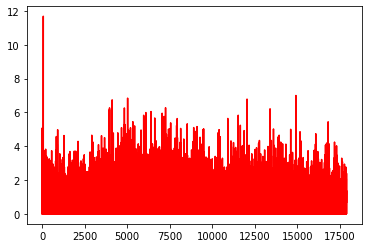

In [0]:
plt.plot(labels, np.log(pixelCount), c='red')

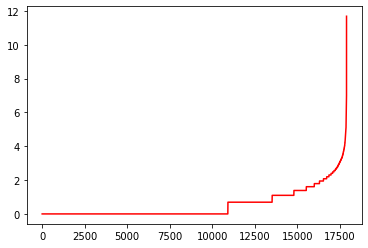

In [0]:
pixelCountorted = np.sort(pixelCount)
plt.plot(np.log(pixelCountorted), c='red')

Label; 67
max: True
min: False
mean: 0.20533948809810879
std: 0.4039494804127312
bitDepth: bool
dimensions: (770, 754)
top_left_value: False


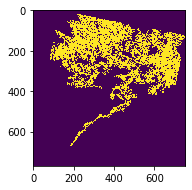

In [0]:
sorter = np.argsort(pixelCount)
largestLabel = labels[sorter][-1]
print('Label;',largestLabel)

largestArea = (labelThreshold == largestLabel)
ourPlot((largestArea), interpolation='nearest', histogram=False)

label: 14919
max: True
min: False
mean: 0.0018946570670708603
std: 0.04348640410138619
bitDepth: bool
dimensions: (770, 754)
top_left_value: False


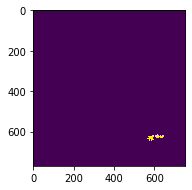

In [0]:
secondLargestLabel = labels[sorter][-2]
print('label:', secondLargestLabel)
secondLargestArea = (labelThreshold == secondLargestLabel)
ourPlot((secondLargestArea), interpolation='nearest', histogram=False)

max: True
min: False
mean: 0.0005890661063074857
std: 0.024263534520549246
bitDepth: bool
dimensions: (770, 754)
top_left_value: False


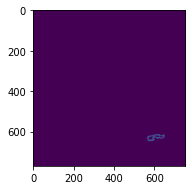

In [0]:
from skimage.morphology import dilation
secondLargestPerm = ~secondLargestArea & dilation(secondLargestArea)
ourPlot(secondLargestPerm, interpolation='bilinear', histogram=False)

max: 32321.0
min: 5937.0
mean: 8067.3477
std: 1037.5475
bitDepth: float32
dimensions: (770, 754)
top_left_value: nan


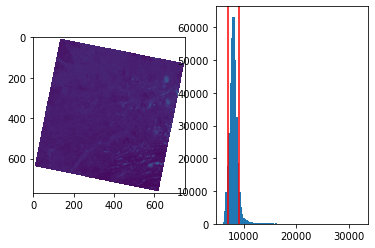

In [0]:
image32 = image.astype(np.float32)
image32[mask] = np.nan
ourPlot(image32)

max: 32321.0
min: 8068.0
mean: 8735.562
std: 824.0713
bitDepth: float32
dimensions: (770, 754)
top_left_value: nan


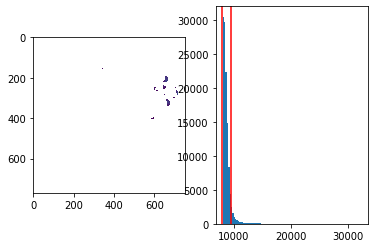

In [0]:
image32LargestArea = image32.copy()
image32LargestArea[~largestArea] = np.nan
ourPlot(image32LargestArea)

In [0]:
def stdScale(a, n=1, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  s0 = np.nanmean(b) - np.nanstd(b)/n
  s1 = np.nanmean(b) + np.nanstd(b)/n
  print('Scale from %f to %f' %(s0,s1))
  b[b<s0] = s1
  b[b>s1] = s1
  return b


Scale from 7029.800171 to 9104.895142
max: 9104.8955
min: 7030.0
mean: 8173.448
std: 604.13574
bitDepth: float32
dimensions: (770, 754)
top_left_value: nan


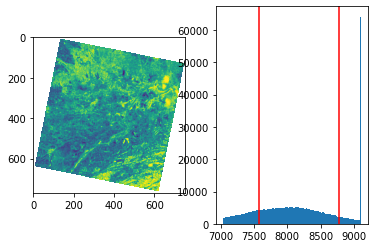

In [0]:
image32_scaled = stdScale(image32)
ourPlot(image32_scaled)

Scale from 7911.490234 to 9559.632812
max: 9559.633
min: 8068.0
mean: 8644.141
std: 422.63675
bitDepth: float32
dimensions: (770, 754)
top_left_value: nan


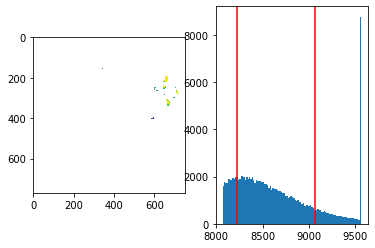

In [0]:
image32LargestArea_scaled = stdScale(image32LargestArea)
ourPlot(image32LargestArea_scaled)

In [0]:
def convert32(a, maskVal=0, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  mask = b == maskVal
  b = b.astype(np.float32)
  b[mask] = np.nan
  return b


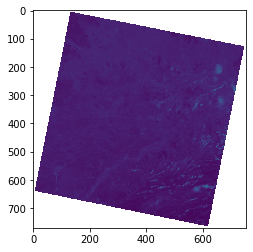

In [0]:
from skimage.feature import peak_local_max
localMaxPts = peak_local_max(image32, min_distance=20)
plt.imshow(image32)
plt.scatter(localMaxPts[:,1], localMaxPts[:,0], c='red')

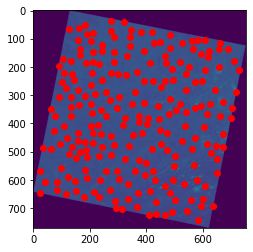

In [0]:
localMaxPts = peak_local_max(image,min_distance=20)
plt.imshow(image)
plt.scatter(localMaxPts[:,1], localMaxPts[:,0], c='red')

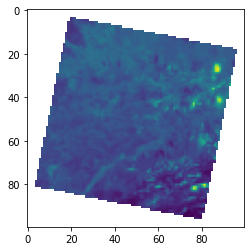

In [0]:
import skimage
image32resamp = skimage.transform.resize(image32, output_shape = [100,100])
plt.imshow(image32resamp)

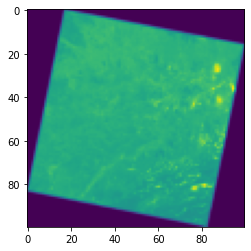

In [0]:
imageResamp = skimage.transform.resize(image, output_shape =[100,100])
plt.imshow(imageResamp)

In [0]:
def normalize(a, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()

  if b.dtype != np.float32:
    b = b.astype(np.float32)
  
  b -= np.nanmin(b)
  b /= np.nanmax(b)

  return b

max: 1.0
min: 0.0
mean: 0.55108714
std: 0.2911645
bitDepth: float32
dimensions: (770, 754)
top_left_value: nan


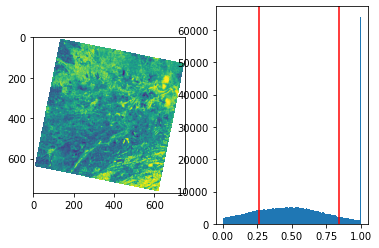

In [0]:
image32_scaled_norm = normalize(image32_scaled)
ourPlot(image32_scaled_norm)

In [0]:
def scale8bit(a, return_mask=True, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  
  if return_mask:
    mask = ~np.isnan(b)
  b *= 255
  b = b.astype(np.uint8)

  if return_mask:
    mask = mask.astype(np.uint8)
    mask *= 255

    return b,mask
  
  else:
    return b


max: 255
min: 0
mean: 100.20971786833856
std: 89.1802035412652
bitDepth: uint8
dimensions: (770, 754)
top_left_value: 0


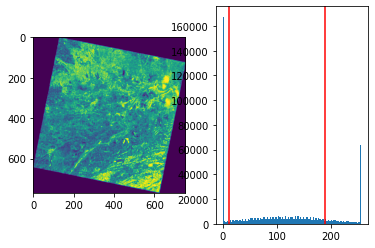

In [0]:
image8bit,mask8bit = scale8bit(image32_scaled_norm)
ourPlot(image8bit)

max: 255
min: 0
mean: 182.39013572634263
std: 115.07963764256336
bitDepth: uint8
dimensions: (770, 754)
top_left_value: 0


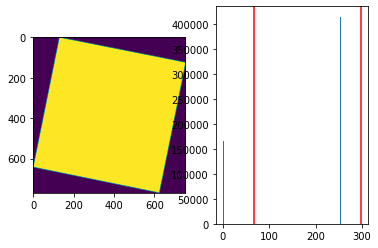

In [0]:
ourPlot(mask8bit)

In [0]:
def makeComposite(bands=[4,3,2]):
  images = []
  for band in bands:
    imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)
    glf.downloadImage(imageUrl, imagePath)
    im = tifffile.imread(imagePath)[::10,::10]
    images.append(im)

  return np.dstack(images)

https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/123/039/LC08_L1TP_123039_20200209_20200209_01_RT/LC08_L1TP_123039_20200209_20200209_01_RT_B4.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B4.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B4.TIF  already found
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/123/039/LC08_L1TP_123039_20200209_20200209_01_RT/LC08_L1TP_123039_20200209_20200209_01_RT_B3.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B3.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B3.TIF  already found
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/123/039/LC08_L1TP_123039_20200209_20200209_01_RT/LC08_L1TP_123039_20200209_20200209_01_RT_B2.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B2.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B2.TIF  already found


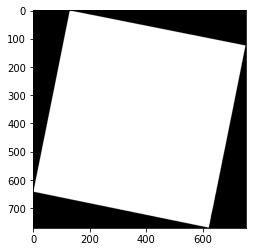

In [0]:
compositeImage = makeComposite([4,3,2])
plt.imshow(compositeImage)

In [0]:
def makeCompositeRGBA(bands=[4,3,2]):
  images=[]
  for band in bands:
    imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)
    glf.downloadImage(imageUrl,imagePath)
    im = tifffile.imread(imagePath)[::10,::10]
    im = convert32(im, inplace=True)
    im = stdScale(im, n=.5, inplace=True) 
    im = normalize(im, inplace=True)
    im,mask = scale8bit(im, return_mask=True, inplace=True)
    images.append(im)
  images.append(mask)

  return np.dstack(images)


https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/123/039/LC08_L1TP_123039_20200209_20200209_01_RT/LC08_L1TP_123039_20200209_20200209_01_RT_B4.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B4.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B4.TIF  already found
Scale from 5992.252686 to 10142.442627
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/123/039/LC08_L1TP_123039_20200209_20200209_01_RT/LC08_L1TP_123039_20200209_20200209_01_RT_B3.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B3.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B3.TIF  already found
Scale from 6743.267334 to 10143.892822
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/123/039/LC08_L1TP_123039_20200209_20200209_01_RT/LC08_L1TP_123039_20200209_20200209_01_RT_B2.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B2.TIF
.\images/LC08_L1TP_123039_20200209_20200209_01_RT_B2.TIF  already found
Scale from 7702.176514 to 10801.540283
max: 255
min: 0
mean: 111.89968135312962
std: 

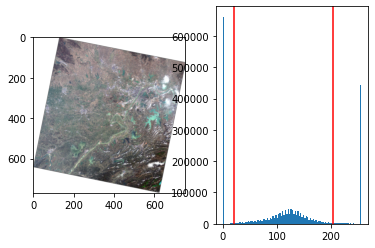

In [0]:
imageRGBA = makeCompositeRGBA([4,3,2])
ourPlot(imageRGBA)

max: 255
min: 0
mean: 182.38574356677805
std: 115.08173249096438
bitDepth: uint8
dimensions: (770, 754)
top_left_value: 0


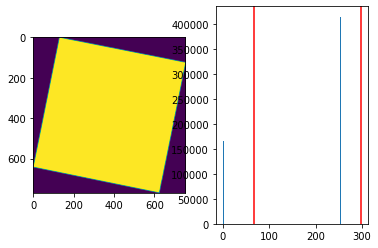

In [0]:
ourPlot(imageRGBA[:,:,3])

In [133]:
import folium
m = folium.Map([selectedScene.lat, selectedScene.lon], zoom_start=8)
folium.raster_layers.ImageOverlay(
  image=imageRGBA,
  bounds=[[selectedScene.min_lat, selectedScene.min_lon], [selectedScene.max_lat, selectedScene.max_lon]],).add_to(m)

m